In [721]:
import os
from PIL import Image
import cv2 as cv
import numpy as np  
from skimage.feature import hog
from skimage import data, exposure

def recupDonne(path):
    B1 = np.zeros(414)
    G1 = np.zeros(414)
    R1 = np.zeros(414)
    Y1 = np.zeros(414)
    C1 = np.zeros(414)
    i = -1
    Z1 = np.zeros((414,1155))
   # size = 256
    for chemin in (path):
        files = os.listdir(chemin)
        for name in files:
                i = i+1
                image = cv.imread(chemin+name) 
                newImg  = cv.GaussianBlur(image, (5, 5), 3)
                #laplacien  =  cv.Laplacien(newImg , cv.CV_64F ) 
                #sobrement  =  cv . Sobel ( image , cv . CV_64F , 0 , 1 , ksize = 5 )
                sobelx  =  cv . Sobel ( newImg , cv . CV_64F , 1 , 0 , ksize = 5 ) 
                #sobrement  =  cv . Sobel ( sobelx , cv . CV_64F , 0 , 1 , ksize = 5 )
                c = cv.split(sobelx)
                b, g, r = cv.split(image)  
                R1[i]=(np.nanmean(r)) 
                B1[i]=(np.nanmean(b))
                G1[i]=(np.nanmean(g))
                C1[i]=(np.nanmean(c))
                if chemin == path1:
                     Y1[i]=1
                else:
                    Y1[i]=-1
               # image = cv.imread(chemin + name) 
                #image = cv.resize(image, (200, 200), interpolation = cv.INTER_CUBIC)
               # fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
               # cells_per_block=(1, 1), visualize=True, multichannel=True)
                #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
                #ax1.axis('off')
                #ax1.imshow(image, cmap=plt.cm.gray)
                #ax1.set_title('Input image')

                # Rescale histogram for better display
                #hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

                #ax2.axis('off')
                #ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
                #ax2.set_title('Histogram of Oriented Gradients')    
                #Z1[i] = fd
    Z1 = np.c_[Z1,R1]
    Z1 = np.c_[Z1,B1]
    Z1 = np.c_[Z1,G1]  
    Z1 = np.c_[Z1,C1] 
    
    return Z1,Y1
#histogramme de gradient = #histogramme d'orientation
#https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html 
#validation croisee
##Les histogrammes de gradients n'ameliorent pas notre classifieur , en plus ca prend un 
#temps enorme pour compiler.

    
             

In [722]:
import matplotlib.pyplot as plt
path = []
path1 = 'Mer/'
path2 = 'Ailleurs/'
path.append(path1)
path.append(path2)
X,Y = recupDonne(path)

In [723]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20) 

In [724]:
from sklearn.naive_bayes import GaussianNB

In [725]:
classifieur = GaussianNB()

In [726]:
classifieur.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [727]:
y_predits = classifieur.predict(X_test)
print("Les vraies classes :")
print(y_test)
print("Les classes prédites :")
print(y_predits)

Les vraies classes :
[-1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1. -1. -1.  1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1. -1.
  1.  1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1. -1. -1. -1.
 -1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.]
Les classes prédites :
[ 1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.
 -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1.
  1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1.
 -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1.]


In [728]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predits)

0.7710843373493976

In [729]:
result = classifieur.predict(X_test[0:]) # ligne 0 et toutes les colonnes
result

array([ 1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1., -1.])

In [730]:
y_test - result

array([-2.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0., -2.,  0.,  0.,
       -2.,  0.,  2.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
        0.,  0.,  0.,  2.,  0.,  0.,  0., -2.,  0.,  0.,  2.,  0.,  0.,
        0., -2.,  0.,  0., -2.,  0., -2.,  0.,  2., -2.,  0.,  2.,  0.,
        0.,  0.,  2.,  0.,  0.])

Calculons le pourcentage d'erreur:

In [731]:
errors = sum(result != y_test) 
print("Nb erreurs:", errors)
print( "Pourcentage de prédiction juste:", (83-errors)*100/83) 


Nb erreurs: 19
Pourcentage de prédiction juste: 77.10843373493977


Model Knn : 

In [732]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [656]:
knn.score(X_test,y_test)

0.7228915662650602

[0 4 4 1 4 1 3 1 0 1 4 0 2 2 1 1 1 4 2 0 1 0 0 2 4 2 4 4 2 1 2 4 0 2 0 1 2
 2 2 2 1 1 0 1 0 0 2 0 4 1 0 1 1 0 0 2 1 2 1 0 0 1 2 1 0 4 1 0 2 2 1 0 1 1
 1 0 2 2 1 1 2 0 3 2 4 1 1 2 3 0 4 3 0 4 0 4 2 0 1 2 1 2 0 1 4 1 0 2 0 2 0
 1 1 1 2 1 4 4 2 1 1 4 2 0 1 0 2 2 0 1 1 1 2 2 1 4 0 0 0 2 1 2 4 2 1 0 3 0
 2 0 0 2 0 2 2 1 1 3 2 4 4 2 2 3 2 4 1 2 4 1 1 2 1 1 2 0 2 0 2 0 4 1 0 2 1
 1 1 4 1 2 2 1 4 1 4 1 2 1 1 3 0 1 4 0 4 1 1 4 0 3 0 0 4 3 0 0 4 3 4 0 1 4
 1 0 3 3 4 0 4 4 3 2 0 4 4 1 0 4 4 4 0 4 2 0 0 1 4 0 2 0 4 4 0 2 4 4 0 4 2
 3 2 0 0 4 4 3 3 3 4 4 3 0 0 0 0 4 4 4 4 3 3 2 4 0 4 2 2 3 0 4 3 4 0 3 3 0
 4 4 4 3 0 3 3 4 4 4 3 3 4 4 0 3 3 1 0 4 4 0 3 1 4 0 2 0 4 3 4 0 0 3 2 4 3
 2 2 4 0 4 3 3 3 4 3 4 3 0 0 4 3 4 0 3 4 3 3 0 0 4 4 1 3 1 4 3 4 3 3 4 0 0
 3 3 3 4 4 3 2 4 4 1 0 3 4 2 3 4 1 3 3 4 0 3 3 4 3 0 4 0 2 0 1 3 4 0 1 0 4
 4 3 4 3 1 1 2]


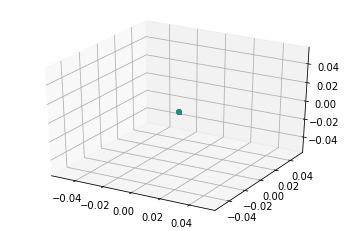

0.08945475148312783

0.08945475148312783

In [657]:
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((331, 1159), (331,))

In [658]:
X_test.shape, y_test.shape


((83, 1159), (83,))

In [659]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7469879518072289

In [660]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, Y, cv=5)
scores

array([0.74698795, 0.73493976, 0.73493976, 0.77108434, 0.75609756])

In [661]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.75 accuracy with a standard deviation of 0.01


In [662]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)


0.7590361445783133

In [663]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386
 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404
 405 406 407 408 409 410 411 412 413] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38 

In [664]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, Y)

clf.score(X, Y)

0.5700483091787439

In [665]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

#X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    #random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()

0.6691742580076403

In [666]:

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()                   

0.7367322950337938

In [667]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, Y, cv=5)
scores.mean()

0.7463708492506612